In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.feature_selection import RFE, RFECV, SelectFromModel
from sklearn.model_selection import train_test_split, learning_curve, LearningCurveDisplay
from sklearn.metrics import f1_score, root_mean_squared_error
from sklearn.neighbors import KNeighborsClassifier

from numpy import linspace
import plotly.express as px

# Carregar e preparar dados - Classificação

In [48]:
# Carregar o dataset
df_fruit = pd.read_csv('datasets/fruit_quality.csv')

In [49]:
df_fruit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   int64  
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 281.4+ KB


In [50]:
# Ajustar o DF
df_fruit.drop('A_id', axis=1, inplace=True)

# Converter valor da variável Quality para numérica (bad=0, good=1)
df_fruit['Quality'] = df_fruit['Quality'].map({'bad': 0, 'good': 1})

In [51]:
df_fruit.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1


# Treinar modelo de KNN com mudança de K

In [52]:
# Separar X e y
X = df_fruit.drop('Quality', axis=1)
y = df_fruit['Quality']

In [53]:
# Separar treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51)

In [54]:
# Fazer um loop para treinar o modelo com diversas de vizinhos (K)
scores_train = []
scores_test = []

for k in range(1, 20, 2):
    # Treinar o modelo
    clf = KNeighborsClassifier(n_neighbors=k)

    # Treinar o modelo
    clf.fit(X_train, y_train)

    # Fazer previsões
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

    # Calcular o F1 Score
    scores_train.append(f1_score(y_train, y_pred_train))
    scores_test.append(f1_score(y_test, y_pred_test))

    print(f'K={k} - F1 Score (Train): {scores_train[-1]} - F1 Score (Test): {scores_test[-1]}')

K=1 - F1 Score (Train): 1.0 - F1 Score (Test): 0.8740617180984154
K=3 - F1 Score (Train): 0.9452103216684341 - F1 Score (Test): 0.8964941569282137
K=5 - F1 Score (Train): 0.9262266148958701 - F1 Score (Test): 0.8985985160758451
K=7 - F1 Score (Train): 0.921935711762628 - F1 Score (Test): 0.8929460580912864
K=9 - F1 Score (Train): 0.9186704384724187 - F1 Score (Test): 0.8913043478260869
K=11 - F1 Score (Train): 0.9178130511463845 - F1 Score (Test): 0.8887029288702929
K=13 - F1 Score (Train): 0.9115983026874116 - F1 Score (Test): 0.8881469115191987
K=15 - F1 Score (Train): 0.9133969600565571 - F1 Score (Test): 0.890728476821192
K=17 - F1 Score (Train): 0.9099258212645708 - F1 Score (Test): 0.8883333333333333
K=19 - F1 Score (Train): 0.9115885875308207 - F1 Score (Test): 0.885


<Axes: xlabel='k', ylabel='train'>

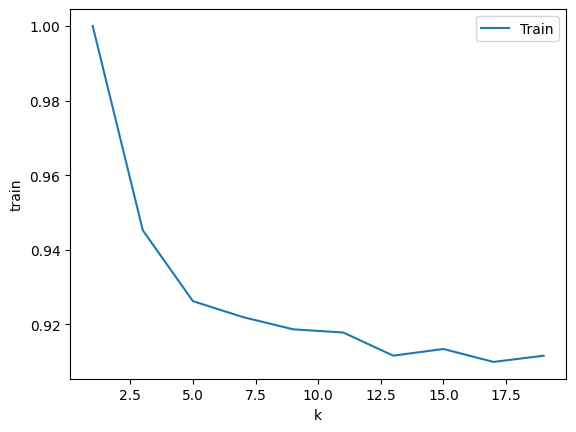

In [55]:
# Criar um dataframe com os scores
df_scores = pd.DataFrame({'k': range(1, 20, 2), 'train': scores_train, 'test': scores_test})

# Plotar o gráfico
sns.lineplot(x='k', y='train', data=df_scores, label='Train')

In [56]:
# Plot com os scores de teste
xaxis = x = [ i for i in range(1, 20, 2)]
fig = px.line(df_scores, x='k', y=['train', 'test'], title='KNN Performance - Mudando k', labels={'value': 'F1 Score', 'k': 'K'})
fig.update_xaxes(tickvals=xaxis, ticktext=[str(i) for i in xaxis])

# Carregar e visualizar os dados

In [57]:
# Carrear os dados - Regressão
df = pd.read_csv('datasets/dataset_colesterol.csv')

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1000 non-null   int64  
 1   Grupo Sanguíneo     996 non-null    object 
 2   Fumante             997 non-null    object 
 3   Nível de Atividade  996 non-null    object 
 4   Idade               997 non-null    float64
 5   Peso                997 non-null    float64
 6   Altura              997 non-null    float64
 7   Colesterol          1000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 62.6+ KB


In [59]:
# Ajustar o df
df.drop('Id', axis=1, inplace=True)

# Coletar medidas das variaveis categoricas
moda_grupo_sanguineo = df['Grupo Sanguíneo'].mode()
moda_fumante = df['Fumante'].mode()
moda_nivel_atividade_fisica = df['Nível de Atividade'].mode()

# Coletar medidas das variaveis numericas
media_idade = df['Idade'].mean()
media_peso = df['Peso'].mean()   
media_altura = df['Altura'].mean()

# Tratar valores ausentes
df.fillna(value={
    'Grupo Sanguíneo': moda_grupo_sanguineo[0],
    'Fumante': moda_fumante[0],
    'Nível de Atividade': moda_nivel_atividade_fisica[0],
    'Idade': media_idade,
    'Peso': media_peso,
    'Altura': media_altura    
}, inplace=True)

# Aplicar One Hot Encoding nas variáveis categóricas
df = pd.get_dummies(df, columns=["Grupo Sanguíneo", "Fumante", "Nível de Atividade"])

In [60]:
# DF atualizado
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Idade                        1000 non-null   float64
 1   Peso                         1000 non-null   float64
 2   Altura                       1000 non-null   float64
 3   Colesterol                   1000 non-null   float64
 4   Grupo Sanguíneo_A            1000 non-null   uint8  
 5   Grupo Sanguíneo_AB           1000 non-null   uint8  
 6   Grupo Sanguíneo_B            1000 non-null   uint8  
 7   Grupo Sanguíneo_O            1000 non-null   uint8  
 8   Fumante_Não                  1000 non-null   uint8  
 9   Fumante_Sim                  1000 non-null   uint8  
 10  Nível de Atividade_Alto      1000 non-null   uint8  
 11  Nível de Atividade_Baixo     1000 non-null   uint8  
 12  Nível de Atividade_Moderado  1000 non-null   uint8  
dtypes: float64(4), uint

# Treinar Modelo de Regressão Linear, visualizando a curva de aprendizado

In [61]:
# Separar X e Y
X = df.drop('Colesterol', axis=1)
y = df['Colesterol']

In [62]:
# Criar modelo
model_reg = LinearRegression()

In [69]:
# Gerar Scores da Curva de Aprendizado - Regressão
train_size_abs, train_scores, test_scores = learning_curve(model_reg, X, y, train_sizes=linspace(0.1, 0.9, 9), scoring='neg_mean_squared_error', cv=3)

In [70]:
train_scores

array([[-47.58887954, -76.06446408, -76.06446408],
       [-56.47688537, -89.01850991, -89.01850991],
       [-62.54875153, -82.18513911, -82.18513911],
       [-74.76977144, -81.2127181 , -81.2127181 ],
       [-71.77830095, -87.05330624, -87.05330624],
       [-70.25369744, -82.67443044, -82.35141208],
       [-71.3753673 , -82.0068445 , -79.7875854 ],
       [-71.9649749 , -80.76893701, -79.33008068],
       [-74.68372184, -82.53554376, -82.79096632]])

Text(0.5, 1.0, 'Curva de Aprendizado - Regressão')

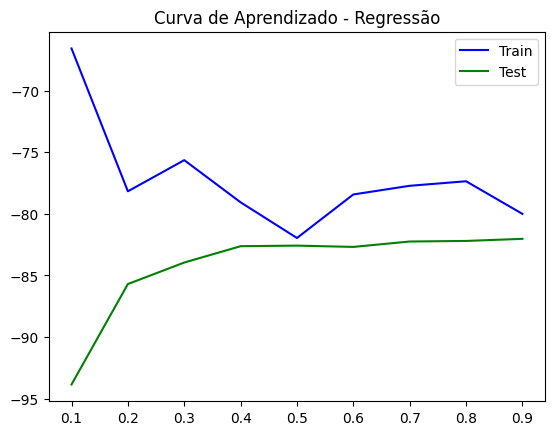

In [79]:
# Gerar plot com curva de aprendizado
plt.plot(linspace(0.1, 0.9, 9), train_scores.mean(axis=1), label='Train', color='blue')
plt.plot(linspace(0.1, 0.9, 9), test_scores.mean(axis=1), label='Test', color='green')
plt.legend()
plt.title('Curva de Aprendizado - Regressão')